可视化各指标的空间分布

In [1]:
import os
import numpy as np
import pandas as pd
from os.path import join as pjoin
from scipy.stats import sem
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir,\
    dataset_name2info, rPath1, rPath2, rPath3, rPath4,\
    rPath5, rPath6, rPath7

work_dir = pjoin(proj_dir, 'analysis/plot/space_dist')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# Define function

In [3]:
def plot_avg_line(data_file, rois, figsize=None, title=None, out_file=None, ylim=None):
    if isinstance(data_file, str):
        df = pd.read_csv(data_file)
    else:
        dfs = []
        for f in data_file:
            dfs.append(pd.read_csv(f))
        df = pd.concat(dfs, axis='columns', join='outer', ignore_index=False)

    n_roi = len(rois)
    x = np.arange(n_roi)
    y = np.array(df.loc[0, rois])

    _, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_xticklabels(rois, rotation=45, ha='right')
    ax.set_ylabel('myelination')
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_title(title)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

In [9]:
def plot_age_lines(data_file, info_file, rois, avg_file=None, figsize=None, title=None, out_file=None, ylim=None, cmap=None):
    if isinstance(data_file, str):
        df = pd.read_csv(data_file)
    else:
        dfs = []
        for f in data_file:
            dfs.append(pd.read_csv(f))
        df = pd.concat(dfs, axis='columns', join='outer', ignore_index=False)
    
    df_info = pd.read_csv(info_file)
    age_vec = np.array(df_info['age in years'])
    age_uniq = np.unique(age_vec)
    n_age = len(age_uniq)
    color_indices = np.linspace(0, 1, n_age)
    if cmap is None:
        cmap = plt.cm.jet

    n_roi = len(rois)
    x = np.arange(n_roi)
    Y = np.array(df.loc[:, rois])
    _, ax = plt.subplots(figsize=figsize)
    for age_idx, age in enumerate(age_uniq):
        age_idx_vec = age_vec == age
        Y_tmp = Y[age_idx_vec]
        y = np.mean(Y_tmp, 0)
        yerr = sem(Y_tmp, 0)
        ax.errorbar(x, y, yerr=yerr, label=age,
                    color=cmap(color_indices[age_idx]))
    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(rois, rotation=45, ha='right')
    ax.set_ylabel('myelination')
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_title(title)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

# Plot

## plot_avg_line

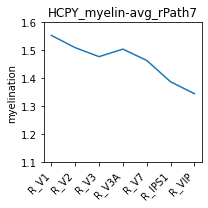

In [7]:
plot_avg_line(
    data_file=pjoin(proj_dir, 'analysis/structure/HCPY_myelin-avg_HCP_MMP1.csv'),
    rois=rPath7, figsize=(3, 3), title='HCPY_myelin-avg_rPath7', ylim=(1.1, 1.6),
    out_file=pjoin(work_dir, 'HCPY_myelin-avg_rPath7.jpg')
)

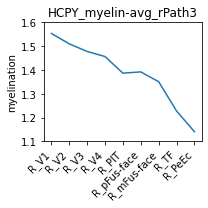

In [29]:
rois = ['R_V1', 'R_V2', 'R_V3', 'R_V4', 'R_PIT', 'R_pFus-face', 'R_mFus-face', 'R_TF', 'R_PeEc']
plot_avg_line(
    data_file=[
        pjoin(proj_dir, 'analysis/structure/HCPY_myelin-avg_HCP_MMP1.csv'),
        pjoin(proj_dir, 'analysis/structure/HCPY_myelin-avg_FFA.csv')
    ],
    rois=rois, figsize=(3, 3), title='HCPY_myelin-avg_rPath3', ylim=(1.1, 1.6),
    out_file=pjoin(work_dir, 'HCPY_myelin-avg_Path.jpg')
)

## plot_age_lines

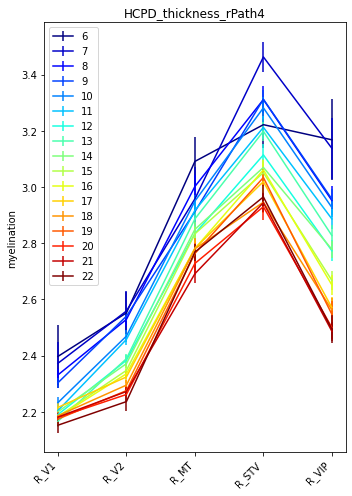

In [13]:
plot_age_lines(
    data_file=pjoin(proj_dir, 'analysis/structure/HCPD_thickness_HCP_MMP1.csv'),
    info_file=dataset_name2info['HCPD'],
    rois=rPath4, figsize=(5, 7), title='HCPD_thickness_rPath4',
    out_file=pjoin(work_dir, 'HCPD_thickness_rPath4.jpg')
)